In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import MeanShift

In [3]:
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

nRows = 3000
nCols = 3
nCentroids = 4

c1 = np.random.uniform(-15, 5, nCols)
c2 = np.random.uniform(-5, 5, nCols)
c3 = np.random.uniform(5, 15, nCols)
c4 = np.random.uniform(0, 5, nCols)
print("c1: {0}\nc2: {1}\nc3: {2}\nc4: {3}".format(c1, c2, c3, c4))

c1: [-7.50919762  4.01428613 -0.36012116]
c2: [ 0.98658484 -3.4398136  -3.4400548 ]
c3: [ 5.58083612 13.66176146 11.01115012]
c4: [3.54036289 0.10292247 4.84954926]


In [4]:
dataset = [[0 for i in range(nCols)] for j in range(nRows)]
colors = ['' for i in range(nRows)]

batch_size = int(np.floor(nRows / nCentroids))
start1, end1 = 0, batch_size
start2, end2 = end1, end1 + batch_size
start3, end3 = end2, end2 + batch_size
start4, end4 = end3, nRows

for i in range(start1, end1):
    colors[i] = 'red'
    for j in range(nCols):
#         dataset[i][j] = np.random.normal(c1[j], abs(np.mean(c1[j]) / 2) )
        dataset[i][j] = np.random.normal(c1[j], 1 )

for i in range(start2, end2):
    colors[i] = 'blue'
    for j in range(nCols):
#         dataset[i][j] = np.random.normal(c2[j], abs(np.mean(c2[j]) / 2) )
        dataset[i][j] = np.random.normal(c2[j], 1 )

for i in range(start3, end3):
    colors[i] = 'green'
    for j in range(nCols):
#         dataset[i][j] = np.random.normal(c3[j], abs(np.mean(c3[j]) / 2) )
        dataset[i][j] = np.random.normal(c3[j], 2 )
    
for i in range(start4, end4):
    colors[i] = 'orange'
    for j in range(nCols):
#         dataset[i][j] = np.random.normal(c1[j], abs(np.mean(c1[j]) / 2) )
        dataset[i][j] = np.random.normal(c4[j], 1 )

df = pd.DataFrame(dataset, columns=['x1', 'x2', 'x3'])

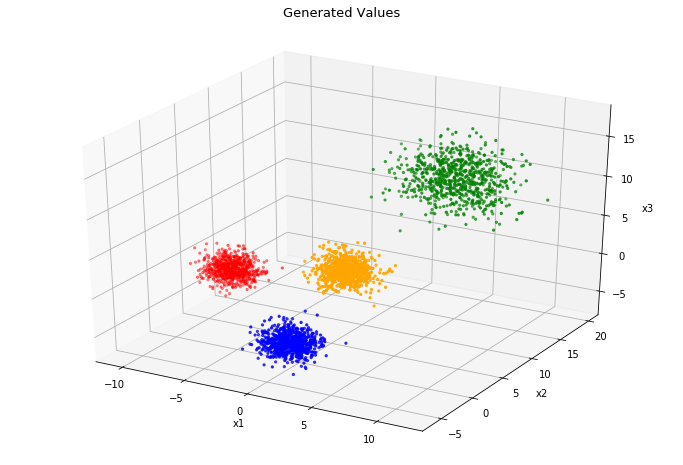

In [5]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['x1'], df['x2'], df['x3'], c=colors, marker='.')
ax.title.set_text("Generated Values")
ax.title.set_fontsize(13)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

plt.show()

In [6]:
fn_to_save = "../data/data_{0}.csv".format(nRows)
df.to_csv(fn_to_save, index=None, header=False)
print(f">>> A dataset is just been saved in {fn_to_save} <<<")

>>> A dataset is just been saved in ../data/data_3000.csv <<<


In [7]:
# %%timeit
mod = MeanShift(bandwidth=4, n_jobs=-1).fit(df.values)

In [8]:
pd.Series(mod.labels_).unique()

array([2, 1, 3, 0])

In [74]:
fn_to_store = "../data/data_{0}_clusters.csv".format(nRows)
cxx_predicted_clusters = pd.read_csv(fn_to_store, header=None)

In [75]:
colors_pred_benchmark = ['' for i in range(nRows)]
colors_pred = ['' for i in range(nRows)]
colors_available_benchmark = ['brown', 'pink', 'black', 'darkgreen', 'violet', 'red', 'orange', 'green', 'navy']
colors_available = [x for x in colors_available_benchmark[::-1]]
for i in range(nRows):
        colors_pred_benchmark[i] = colors_available_benchmark[mod.labels_[i]]
        colors_pred[i] = colors_available[cxx_predicted_clusters[0][i]]

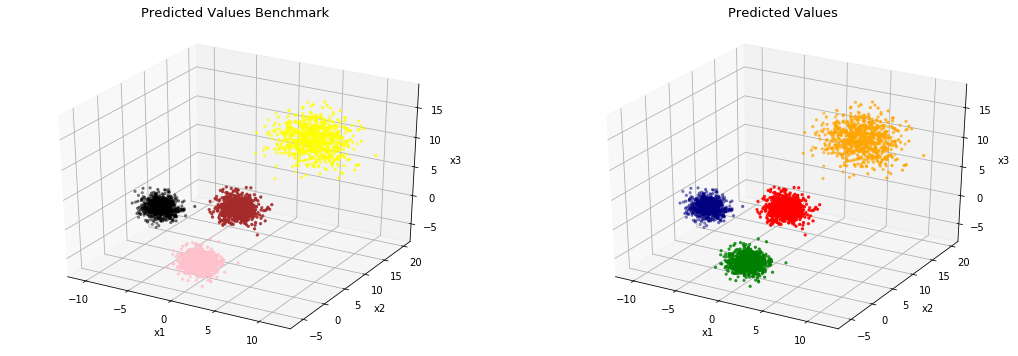

In [11]:
fig = plt.figure(figsize=(18, 6))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(df['x1'], df['x2'], df['x3'], c=colors_pred_benchmark, marker='.')
ax.title.set_text("Predicted Values Benchmark")
ax.title.set_fontsize(13)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

ax = fig.add_subplot(122, projection='3d')
ax.scatter(df['x1'], df['x2'], df['x3'], c=colors_pred, marker='.')
ax.title.set_text("Predicted Values")
ax.title.set_fontsize(13)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')

plt.show()

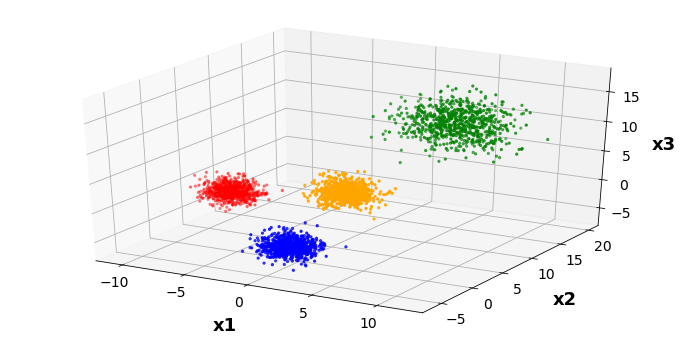

In [65]:
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x1'], df['x2'], df['x3'], c=colors, marker='.')
# ax.title.set_text("Generated Values")
# ax.title.set_fontsize(24)
# ax.title.set_fontweight('bold')

ax.set_xlabel('x1', fontweight='bold', labelpad=20, fontsize=18)
ax.set_ylabel('x2', fontweight='bold', labelpad=20, fontsize=18)
ax.set_zlabel('x3', fontweight='bold', labelpad=10, fontsize=18)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax.zaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.savefig("../report/figures/generated_3000.png", format='png')
plt.show()

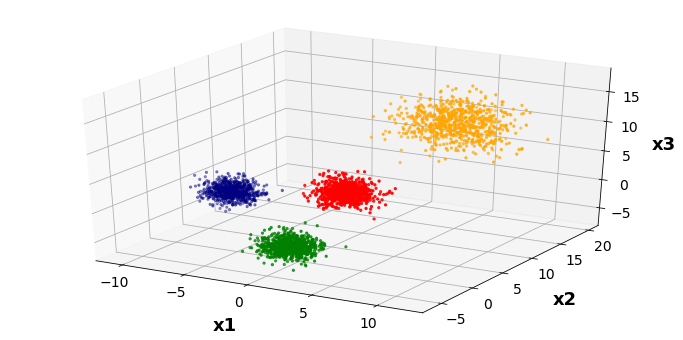

In [82]:
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['x1'], df['x2'], df['x3'], c=colors_pred, marker='.')
# ax.title.set_text("Predicted Values")
# ax.title.set_fontsize(24)
# ax.title.set_fontweight('bold')

ax.set_xlabel('x1', fontweight='bold', labelpad=20, fontsize=18)
ax.set_ylabel('x2', fontweight='bold', labelpad=20, fontsize=18)
ax.set_zlabel('x3', fontweight='bold', labelpad=10, fontsize=18)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax.zaxis.get_major_ticks():
    tick.label.set_fontsize(14)

plt.savefig("../report/figures/clusterized_3000.png", format='png')
plt.show()

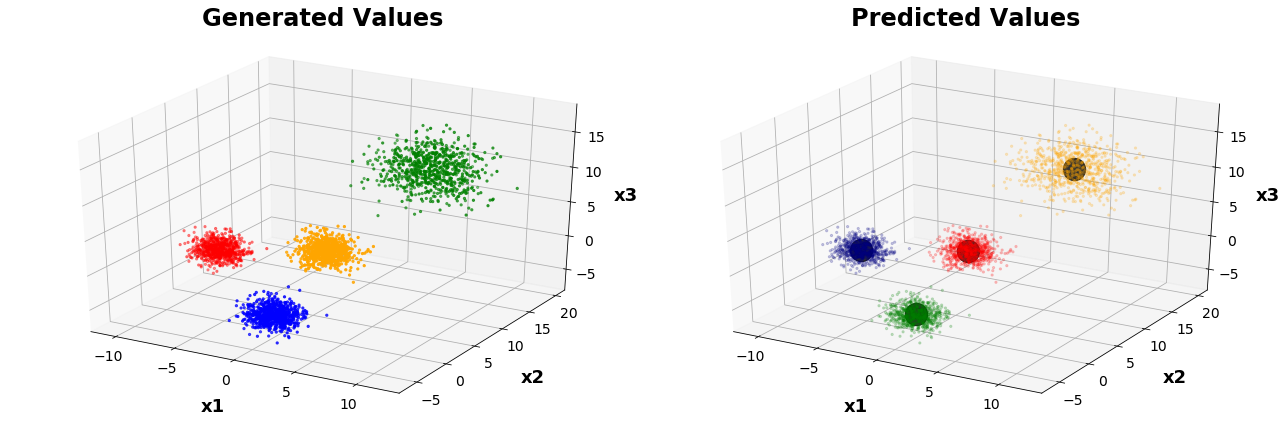

In [79]:
fig = plt.figure(figsize=(18, 6))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(df['x1'], df['x2'], df['x3'], c=colors, marker='.')
ax.title.set_text("Generated Values")
ax.title.set_fontsize(24)
ax.title.set_fontweight('bold')

ax.set_xlabel('x1', fontweight='bold', labelpad=20, fontsize=18)
ax.set_ylabel('x2', fontweight='bold', labelpad=20, fontsize=18)
ax.set_zlabel('x3', fontweight='bold', labelpad=10, fontsize=18)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax.zaxis.get_major_ticks():
    tick.label.set_fontsize(14)

ax = fig.add_subplot(122, projection='3d')
ax.scatter(df['x1'], df['x2'], df['x3'], c=colors_pred, marker='.', alpha=0.2, s=20)
ax.title.set_text("Predicted Values")
ax.title.set_fontsize(24)
ax.title.set_fontweight('bold')

ax.set_xlabel('x1', fontweight='bold', labelpad=20, fontsize=18)
ax.set_ylabel('x2', fontweight='bold', labelpad=20, fontsize=18)
ax.set_zlabel('x3', fontweight='bold', labelpad=10, fontsize=18)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
for tick in ax.zaxis.get_major_ticks():
    tick.label.set_fontsize(14)

all_centroids = [c1, c2, c3, c4]
for centroid in all_centroids:
    ax.scatter(centroid[0], centroid[1], centroid[2], c='black', marker='o', s=500, alpha=0.8)

plt.tight_layout()
plt.savefig("../presentation/figures/clusterized_3000.png", format='png')
plt.show()